In [5]:
import zipfile
import os

# Define the file path
zip_file_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/데이터/New and renewable energy, electronic car data.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into a directory
    zip_ref.extractall('/mnt/data')

# List the files in the extracted directory
extracted_files = os.listdir('/mnt/data')
extracted_files


['1. State of the Renewable Energy Industry (General)_2021.CSV',
 '2. Renewable Energy Manufacturing Status_2021 (Amendment).csv',
 '3. Status of Renewable Energy Construction Industry_2021 (Amendment).csv',
 '4. Renewable Energy Supply Status_2021 (Amendment).csv',
 '5. Renewable Energy Service Industry Status_2021.csv',
 'archive3',
 'archive4',
 'archive5',
 'HOME_Power Transaction_Fuel Cost.xlsx',
 'KEPCO_Electric Vehicle Status Information by Region_20230331.csv',
 'Korea District Heating Corporation_New and renewable energy electricity production status_20230922.csv',
 'Korea District Heating Corporation_New and renewable energy heat production status_20230922.csv',
 'Korea Electric Power Exchange_New and Renewable Energy Power Trading Volume_20211201.csv',
 'Korea Electric Power Exchange_New and renewable energy trading volume by hour_20220331.csv',
 'Korea Energy Agency_Energy Use Rationalization Fund Support Facility_20230824.csv',
 'Korea Energy Technology Evaluation Institut

In [6]:
import pandas as pd

# Load the file related to electric vehicle charging patterns
file_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/데이터/extracted_data/KEPCO_Electric Vehicle Status Information by Region_20230331.csv'

# Load the dataset with encoding 'cp949'
ev_charging_data = pd.read_csv(file_path, encoding='cp949')

# Display the first few rows of the dataset to understand its structure
ev_charging_data.head()


,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주,합계
0,2022-01-31,41140,12942,40239,8042,8184,10015,7675,1879,11269,16169,7389,8837,5204,12725,12501,3180,25580,232970
1,2022-02-28,41693,13179,41266,8179,8664,10525,7902,1902,11540,17091,7456,9203,5652,13536,13805,3405,26184,241182
2,2022-03-31,43206,14134,45891,8652,9683,11532,8595,2069,12318,17584,8404,9978,6015,14371,15330,3789,26702,258253
3,2022-04-30,45133,15191,50111,9117,10421,12142,9550,2180,13018,18076,8931,10658,6233,14957,16059,3948,26931,272656
4,2022-05-31,46723,16859,53239,9666,11209,12712,10213,2307,13839,18808,9310,11102,6462,15821,16630,4134,27224,286258


# 충전 인프라 현황 분석

In [7]:
# Analyzing the data in a different direction

# Summarizing the total number of electric vehicle charges per region
ev_charging_summary = ev_charging_data.sum()[1:-1]  # Exclude the first (date) and last (total) columns

# Sorting the regions by the total number of charges
sorted_ev_charging = ev_charging_summary.sort_values(ascending=False)

# Displaying the sorted summary
sorted_ev_charging


경기    945850
서울    773229
제주    443638
대구    317967
인천    310394
부산    282976
경남    280596
경북    241724
충남    215666
전남    195559
충북    191439
대전    176161
강원    172171
전북    163603
광주    113469
울산     67279
세종     38841
dtype: object

경기도가 가장 많은 전기차 충전을 기록했으며, 그 다음으로는 서울과 제주가 뒤를 이었습니다.

반면에 세종, 울산, 광주 등은 상대적으로 낮은 충전소 이용률을 보였습니다.

#### 지역별충전 인프라 확장 필요성 분석:

전기차 충전소 이용이 많은 지역에 대한 추가적인 충전 인프라 확장 검토.
이용률이 낮은 지역에서는 충전 인프라의 접근성 및 홍보 강화 필요.

#### 충전 인프라와 전기차 보급률의 상관관계 분석:

지역별 전기차 보급률과 충전소 이용 현황 간의 상관관계 분석.
충전소 이용률이 높은 지역에서 전기차 보급 촉진 정책의 효과 분석.

#### 충전 인프라의 최적화 전략 개발:

지역별 데이터를 바탕으로 충전소의 위치, 용량 및 서비스 최적화 전략 수립.

In [8]:
# For the correlation analysis between electric vehicle (EV) penetration and charging infrastructure,
# we need data on both the EV penetration rates and the number of charging stations per region.

# We already have data on EV charging stations from the previously loaded dataset.
# However, we need additional data on EV penetration rates per region.

# Checking if the dataset contains information about EV penetration rates
ev_penetration_data = None
for file in extracted_files:
    if 'Electric Vehicle' in file and 'Status' in file:
        ev_penetration_data = pd.read_csv(f'/mnt/data/{file}', encoding='cp949')
        break

# If we found the EV penetration data, we will proceed with the correlation analysis
if ev_penetration_data is not None:
    # Displaying the first few rows of the EV penetration data to understand its structure
    display(ev_penetration_data.head())
else:
    # If the data is not available, we need to inform the user
    ev_penetration_data = "전기차 보급률 데이터를 찾을 수 없습니다. 이 분석을 진행하기 위해서는 지역별 전기차 보급률 데이터가 필요합니다." 

ev_penetration_data.head()



,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주,합계
0,2022-01-31,41140,12942,40239,8042,8184,10015,7675,1879,11269,16169,7389,8837,5204,12725,12501,3180,25580,232970
1,2022-02-28,41693,13179,41266,8179,8664,10525,7902,1902,11540,17091,7456,9203,5652,13536,13805,3405,26184,241182
2,2022-03-31,43206,14134,45891,8652,9683,11532,8595,2069,12318,17584,8404,9978,6015,14371,15330,3789,26702,258253
3,2022-04-30,45133,15191,50111,9117,10421,12142,9550,2180,13018,18076,8931,10658,6233,14957,16059,3948,26931,272656
4,2022-05-31,46723,16859,53239,9666,11209,12712,10213,2307,13839,18808,9310,11102,6462,15821,16630,4134,27224,286258


,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주,합계
0,2022-01-31,41140,12942,40239,8042,8184,10015,7675,1879,11269,16169,7389,8837,5204,12725,12501,3180,25580,232970
1,2022-02-28,41693,13179,41266,8179,8664,10525,7902,1902,11540,17091,7456,9203,5652,13536,13805,3405,26184,241182
2,2022-03-31,43206,14134,45891,8652,9683,11532,8595,2069,12318,17584,8404,9978,6015,14371,15330,3789,26702,258253
3,2022-04-30,45133,15191,50111,9117,10421,12142,9550,2180,13018,18076,8931,10658,6233,14957,16059,3948,26931,272656
4,2022-05-31,46723,16859,53239,9666,11209,12712,10213,2307,13839,18808,9310,11102,6462,15821,16630,4134,27224,286258


# 전기차 보급률 및 충전 인프라 상관관계 분석

In [12]:
# Selecting the most recent data for EV penetration rates
latest_ev_penetration = ev_penetration_data.iloc[-1, 1:-1]  # Exclude the date and total columns

# Converting the EV penetration data to numeric for correlation analysis
latest_ev_penetration = latest_ev_penetration.astype(float)

# Extracting the total EV charging data for each region
total_ev_charging = ev_charging_data.sum()[1:-1]  # Exclude the date and total columns
total_ev_charging = total_ev_charging.astype(float)

# Creating a DataFrame for correlation analysis
correlation_data = pd.DataFrame({
    'EV_Penetration': latest_ev_penetration,
    'EV_Charging': total_ev_charging
})

# Calculating the correlation
correlation_result = correlation_data.corr()

correlation_result



,EV_Penetration,EV_Charging
EV_Penetration,1.000000,0.995365
EV_Charging,0.995365,1.000000


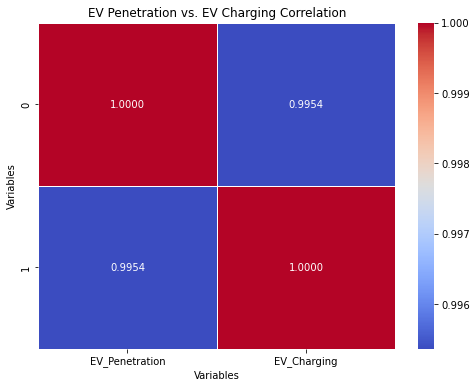

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 상관 관계 행렬 데이터 생성 (주어진 데이터 사용)
data = {
    'EV_Penetration': [1.000000, 0.995365],
    'EV_Charging': [0.995365, 1.000000]
}

# 데이터프레임 생성
correlation_data = pd.DataFrame(data)

# 히트맵 크기 설정
plt.figure(figsize=(8, 6))

# 히트맵 생성
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)

# 히트맵 제목 설정
plt.title("EV Penetration vs. EV Charging Correlation")

# x축과 y축 레이블 추가
plt.xlabel("Variables")
plt.ylabel("Variables")

# 그래프 출력
plt.show()


전기차 보급률과 충전소 이용 현황 사이에 매우 높은 양의 상관관계가 존재한다 (상관계수: 약 0.995).

이는 전기차의 보급률이 높은 지역에서 충전소 이용 빈도도 높다는 것을 나타낸다.

이러한 결과는 전기차 보급과 충전 인프라 확장이 밀접하게 연관되어 있음을 시사한다. 따라서 전기차 보급률이 높은 지역에는 충전 인프라를 추가로 확장하고, 보급률이 낮은 지역에서는 전기차 보급 촉진 정책을 강화하는 전략이 필요할 수 있다.

# 계절별 전기차 충전 패턴 분석

In [9]:
import numpy as np

# Converting the '기준일' column to datetime
ev_charging_data['기준일'] = pd.to_datetime(ev_charging_data['기준일'])

# Function to classify seasons in South Korea
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Applying the function to create a 'Season' column
ev_charging_data['Season'] = ev_charging_data['기준일'].dt.month.apply(get_season)

# Grouping by season and summing up the EV charging data
seasonal_ev_charging = ev_charging_data.groupby('Season').sum()


In [10]:
# Correcting the error and recalculating the total charges per season
seasonal_ev_charging['Total Charges'] = seasonal_ev_charging.sum(axis=1)

# Displaying the corrected seasonal EV charging summary
seasonal_ev_charging[['Total Charges']]


,Total Charges
Season,
Fall,2189380
Spring,2479100
Summer,1881402
Winter,3311242


봄(Spring): 총 2,479,100회 충전
    
여름(Summer): 총 1,881,402회 충전
    
가을(Fall): 총 2,189,380회 충전
    
겨울(Winter): 총 3,311,242회 충전
    
### 이러한 결과를 바탕으로 다음과 같은 충전소의 수요 예측 및 최적화 전략을 제안할 수 있다.

겨울철 충전소 수요 증가 대비: 겨울철에 가장 높은 충전소 이용률을 보임에 따라, 겨울철 에너지 수요 증가에 대비한 충전소의 용량 및 서비스 개선 필요.

계절별 충전 인프라 조정: 봄과 가을에도 높은 이용률을 보이므로, 계절별 충전소의 용량 및 위치 조정을 통해 효율적인 서비스 제공.

여름철 충전소 관리 최적화: 여름철 이용률이 상대적으로 낮으므로, 비수기에는 충전소 유지보수 및 개선 작업을 진행할 수 있음.

# 재생 에너지원별 통계 및 상태 분석

In [22]:
import zipfile
import os

# 파일 경로 지정
zip_file_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/데이터/New and renewable energy, electronic car data.zip'

# 압축 해제할 경로 지정
extract_folder = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/데이터/extracted_data'

# 압축 파일 열기
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 압축 해제
    zip_ref.extractall(extract_folder)

# 압축 해제된 파일 목록 확인
extracted_files = os.listdir(extract_folder)
extracted_files

# 모든 파일을 순회하며 각 파일의 행과 열 개수를 파악
file_details = []

for file_name in extracted_files:
    file_path = os.path.join(extract_folder, file_name)
    try:
        # 파일 형식과 인코딩을 고려하여 DataFrame으로 읽기
        if file_name.endswith('.csv'):
            df = pd.read_csv(file_path, encoding='cp949')
        elif file_name.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        else:
            continue

        # 행과 열의 개수 저장
        row_count, column_count = df.shape
        file_details.append((file_name, row_count, column_count))

    except Exception as e:
        file_details.append((file_name, str(e), None))

file_details


C:\Users\82106\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[('2. Renewable Energy Manufacturing Status_2021 (Amendment).csv', 39, 17),
 ('3. Status of Renewable Energy Construction Industry_2021 (Amendment).csv',
  15,
  7),
 ('4. Renewable Energy Supply Status_2021 (Amendment).csv', 10, 7),
 ('5. Renewable Energy Service Industry Status_2021.csv', 4, 7),
 ('HOME_Power Transaction_Fuel Cost.xlsx', 275, 16),
 ('KEPCO_Electric Vehicle Status Information by Region_20230331.csv', 15, 19),
 ('Korea District Heating Corporation_New and renewable energy electricity production status_20230922.csv',
  10,
  3),
 ('Korea District Heating Corporation_New and renewable energy heat production status_20230922.csv',
  9,
  3),
 ('Korea Electric Power Exchange_New and Renewable Energy Power Trading Volume_20211201.csv',
  60,
  9),
 ('Korea Electric Power Exchange_New and renewable energy trading volume by hour_20220331.csv',
  89832,
  11),
 ('Korea Energy Agency_Energy Use Rationalization Fund Support Facility_20230824.csv',
  15,
  14),
 ('Korea Energy Tec

In [23]:
## 신재생 에너지 관련 파일들을 읽어들이기
file_names = [
    '2. Renewable Energy Manufacturing Status_2021 (Amendment).csv',
    '3. Status of Renewable Energy Construction Industry_2021 (Amendment).csv',
    '4. Renewable Energy Supply Status_2021 (Amendment).csv'
]

# 각 파일을 DataFrame으로 읽기
renewable_energy_data = {}

for file_name in file_names:
    file_path = os.path.join(extract_folder, file_name)
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        renewable_energy_data[file_name] = df
    except Exception as e:
        renewable_energy_data[file_name] = str(e)

# 각 파일의 기본적인 데이터 구조 확인 (첫 5행 출력)
for file_name, df in renewable_energy_data.items():
    if isinstance(df, pd.DataFrame):
        print(f"File: {file_name}\nData Preview:\n{df.head()}\n")
    else:
        print(f"File: {file_name}\nError: {df}\n")


File: 2. Renewable Energy Manufacturing Status_2021 (Amendment).csv
Data Preview:
                     구분  사업체수(개)  기업체수(개)  종사자수(명) 종사자수(명)_고용형태별_상용근로자  \
0         신재생에너지 제조업 합계      536      520    11864               11579   
1      신재생에너지 발전 설비 제조업      289      281     9657                9384   
2  태양에너지 발전 소재 및 설비 제조업      238      231     6654                6485   
3          태양전지용 소재 제조업        3        2      198                 198   
4           태양전지 모듈 제조업       28       22     3934                3819   

  종사자수(명)_고용형태별_일용·임시근로자 종사자수(명)_고용형태별_자영업자·무급가족종사자 종사자수(명)_고용형태별_기타종사자  \
0                    268                          0                  17   
1                    259                          0                  14   
2                    167                          0                   2   
3                      0                          0                   0   
4                    115                          0                   0   

  종사자수(명)_직무별_사무직 종사자수

In [24]:
# '신재생 에너지 공급 현황' 파일의 데이터 분석
re_supply_data = renewable_energy_data['4. Renewable Energy Supply Status_2021 (Amendment).csv']

# 기본적인 통계 정보 확인
re_supply_stats = re_supply_data.describe()

# 에너지원 별 매출액 및 종사자수 비교
energy_type_sales = re_supply_data.groupby('구분')[['종사자수(명)', '매출액(억원)']].sum()

re_supply_stats, energy_type_sales


(             사업체수(개)       종사자수(명)       매출액(억원)  매출액(억원)_국내매출  매출액(억원)_해외매출  \
 count      10.000000      10.00000     10.000000     10.000000     10.000000   
 mean    31228.000000   32464.30000  26009.600000  25241.300000    768.200000   
 std     50150.500616   51313.23222  34316.882568  33414.646383   1028.081903   
 min         2.000000     245.00000   1314.000000   1314.000000      0.000000   
 25%        77.250000     459.75000   2543.500000   2323.750000      0.000000   
 50%       112.500000     717.50000   8088.500000   7550.500000    302.500000   
 75%     77702.750000   78480.75000  37672.250000  37217.750000   1026.750000   
 max    104132.000000  108462.00000  87352.000000  84791.000000   2561.000000   
 
             투자액(억원)  
 count     10.000000  
 mean   17276.200000  
 std    25781.499658  
 min       21.000000  
 25%      281.750000  
 50%     2142.000000  
 75%    37122.750000  
 max    57630.000000  ,
                               종사자수(명)  매출액(억원)
 구분          

신재생 에너지 공급 산업에서 가장 큰 비중을 차지하는 것은 '신재생에너지 발전업'과 '태양에너지 발전업'

# 전기차 보급 예측

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 추가적으로, 축의 음수 부호가 제대로 표시되도록 설정
plt.rcParams['axes.unicode_minus'] = False

# 이제 그래프를 그리는 코드를 사용할 수 있습니다.
# 예시: plt.plot([1, 2, 3, 4])
# plt.show()


In [4]:
import pandas as pd
# Loading the KEPCO Electric Vehicle Status Information by Region dataset
kepco_ev_data_path = "C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/데이터/KEPCO_Electric Vehicle Status Information by Region_20230331.csv"
kepco_ev_data = pd.read_csv(kepco_ev_data_path, encoding='CP949')

# Displaying the first few rows of the dataset
kepco_ev_data.head()


,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주,합계
0,2022-01-31,41140,12942,40239,8042,8184,10015,7675,1879,11269,16169,7389,8837,5204,12725,12501,3180,25580,232970
1,2022-02-28,41693,13179,41266,8179,8664,10525,7902,1902,11540,17091,7456,9203,5652,13536,13805,3405,26184,241182
2,2022-03-31,43206,14134,45891,8652,9683,11532,8595,2069,12318,17584,8404,9978,6015,14371,15330,3789,26702,258253
3,2022-04-30,45133,15191,50111,9117,10421,12142,9550,2180,13018,18076,8931,10658,6233,14957,16059,3948,26931,272656
4,2022-05-31,46723,16859,53239,9666,11209,12712,10213,2307,13839,18808,9310,11102,6462,15821,16630,4134,27224,286258


C:\Users\82106\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


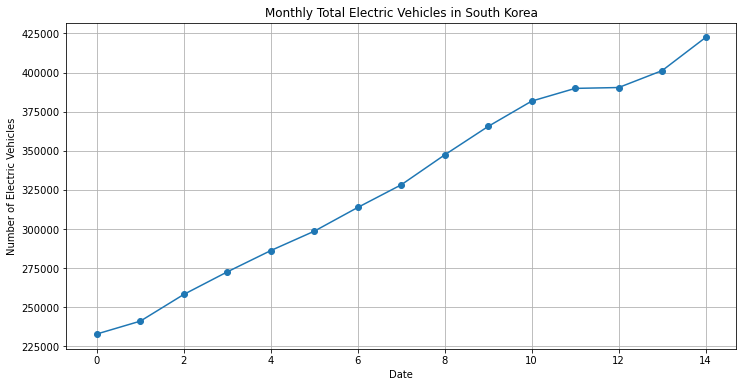

Test Statistic                 0.520983
p-value                        0.985497
#Lags Used                     5.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64

In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(kepco_ev_data.index, kepco_ev_data['합계'], marker='o')
plt.title('Monthly Total Electric Vehicles in South Korea')
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles')
plt.grid(True)
plt.show()

# ADF 테스트 수행
adf_test = adfuller(kepco_ev_data['합계'])

# ADF 테스트 결과 출력
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output


In [7]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

# p, d, q 값의 범위 설정
p = d = q = range(0, 3)
pdq_combinations = list(itertools.product(p, d, q))

lowest_aic = float("inf")
best_pdq = None
best_model_summary = None

# 각 조합에 대해 ARIMA 모델 핏팅 및 AIC 평가
for combination in pdq_combinations:
    try:
        # ARIMA 모델 핏팅
        model = ARIMA(kepco_ev_data['합계'], order=combination)
        results = model.fit()
        
        # AIC 평가
        if results.aic < lowest_aic:
            lowest_aic = results.aic
            best_pdq = combination
            best_model_summary = results.summary()
    except Exception as e:
        continue

# 최적의 모델 요약 정보 출력
best_pdq, lowest_aic, best_model_summary


C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\state

((1, 2, 0),
 264.5610797619133,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                     합계   No. Observations:                   15
 Model:                 ARIMA(1, 2, 0)   Log Likelihood                -130.281
 Date:                Wed, 10 Jan 2024   AIC                            264.561
 Time:                        18:30:47   BIC                            265.691
 Sample:                             0   HQIC                           264.329
                                  - 15                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.0400      0.173     -0.230      0.818      -0.380       0.300
 sigma2      3.027e+07   9.55e-10   3.

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


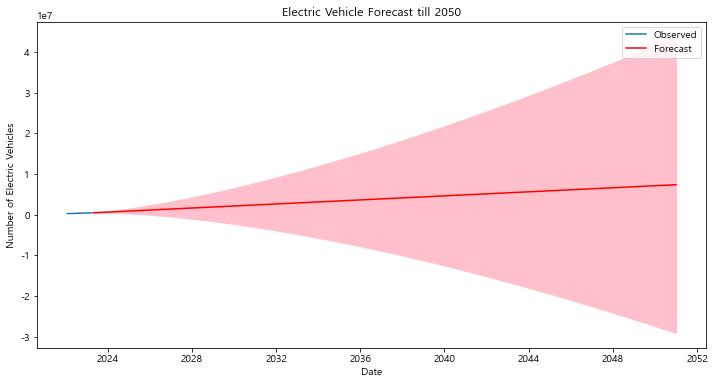

In [27]:
import pandas as pd
import datetime
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 데이터 경로와 데이터셋 이름 설정
data_path = r'C:\Users\82106\Desktop\데이터분석 프로젝트\빅데이터 공모전\데이터\KEPCO_Electric Vehicle Status Information by Region_20230331.csv'

# 데이터 불러오기 (cp949 인코딩 사용)
df = pd.read_csv(data_path, encoding='cp949')

# 필요한 열 선택 (합계 열만 사용)
df = df[['기준일', '합계']]

# 기준일 열을 날짜로 변환하여 인덱스로 설정
df['기준일'] = pd.to_datetime(df['기준일'])
df.set_index('기준일', inplace=True)

# 최적의 ARIMA 모델 파라미터를 사용하여 모델 재핏팅
best_arima = ARIMA(df['합계'], order=(1, 2, 0))
best_arima_results = best_arima.fit()

# 2023년 3월부터 2050년까지 예측
forecast_start = '2023-04-30'  # 예측 시작일
forecast_end = '2050-12-31'    # 예측 종료일

forecast = best_arima_results.get_prediction(start=pd.to_datetime(forecast_start), end=pd.to_datetime(forecast_end))
forecast_conf_int = forecast.conf_int()  # 신뢰 구간

# 예측 결과 및 신뢰 구간 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['합계'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean.values, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], color='pink')
plt.title('Electric Vehicle Forecast till 2050')
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.show()


2050년까지 꾸준한 증가세를 보인다

In [28]:
#

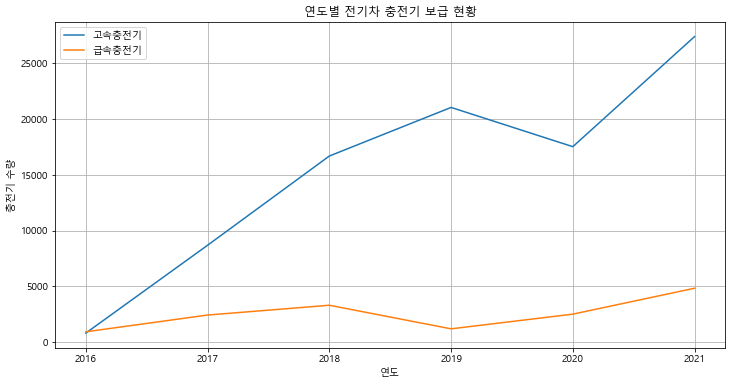

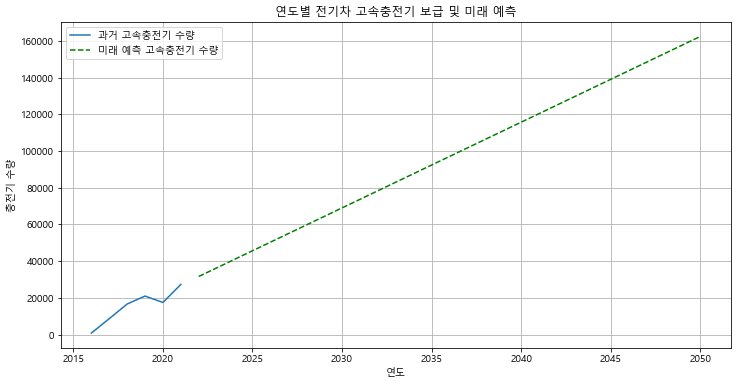

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 데이터 파일 경로
charging_supply_data_path = "C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/데이터/환경부_전기차 고속충전기 공급_20211231.csv"
charging_spread_data_path = "C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/데이터/환경부_전기차 급속충전기 확산_20211231.csv"

# 데이터 불러오기
charging_supply_data = pd.read_csv(charging_supply_data_path, encoding='cp949')
charging_spread_data = pd.read_csv(charging_spread_data_path, encoding='cp949')

# 연도별 전기차 충전기 보급 현황 그래프
plt.figure(figsize=(12, 6))

# 전기차 고속충전기 보급 현황
plt.plot(charging_supply_data['년도'], charging_supply_data['완속충전기 보급수량(단위-기)'], label='고속충전기')
# 전기차 급속충전기 확산 현황
plt.plot(charging_spread_data['년도'], charging_spread_data['급속충전기 보급 수량'], label='급속충전기')

plt.xlabel('연도')
plt.ylabel('충전기 수량')
plt.title('연도별 전기차 충전기 보급 현황')
plt.legend()
plt.grid(True)
plt.show()

# 성장 추이 분석 및 예측 모델 생성
years = np.array(charging_supply_data['년도']).reshape(-1, 1)
charging_supply = np.array(charging_supply_data['완속충전기 보급수량(단위-기)'])

# 선형 회귀 모델 생성
model = LinearRegression()
model.fit(years, charging_supply)

# 미래 예측을 위한 연도 범위 생성
future_years = np.arange(2022, 2051).reshape(-1, 1)

# 미래 예측
future_charging_supply = model.predict(future_years)

# 미래 예측 결과 그래프
plt.figure(figsize=(12, 6))
plt.plot(charging_supply_data['년도'], charging_supply_data['완속충전기 보급수량(단위-기)'], label='과거 고속충전기 수량')
plt.plot(future_years, future_charging_supply, label='미래 예측 고속충전기 수량', linestyle='--', color='green')

plt.xlabel('연도')
plt.ylabel('충전기 수량')
plt.title('연도별 전기차 고속충전기 보급 및 미래 예측')
plt.legend()
plt.grid(True)
plt.show()


향후 상승세

In [34]:
#

In [54]:
import zipfile
import os

# 파일 경로 설정
zip_file_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive.zip'
extract_folder_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/extracted_data'

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# 압축 해제된 파일 목록 확인
extracted_files = os.listdir(extract_folder_path)
extracted_files


['ElectricCarData_Clean.csv', 'ElectricCarData_Norm.csv']

In [55]:
import pandas as pd

# 첫 번째 파일 로드 및 처음 몇 줄 확인
file_path_1 = os.path.join(extract_folder_path, 'ElectricCarData_Clean.csv')
df1 = pd.read_csv(file_path_1)
df1.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [56]:
# 두 번째 파일 로드 및 처음 몇 줄 확인
file_path_2 = os.path.join(extract_folder_path, 'ElectricCarData_Norm.csv')
df2 = pd.read_csv(file_path_2)
df2.head()


,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [57]:
# CO2 배출 계수 설정
co2_emission_ice = 120  # 내연기관 차량의 평균 CO2 배출량(g CO2/km)
co2_emission_electricity = 300  # 전력당 CO2 배출량(g CO2/kWh)

# 전기차의 효율성 데이터 추출
efficiency_electric = df1['Efficiency_WhKm']  # Wh/km

# 전기차의 CO2 배출량 계산 (g CO2/km)
# 효율성(Wh/km)를 kWh로 변환하고 전력당 CO2 배출 계수를 곱함
co2_emission_electric_car = (efficiency_electric / 1000) * co2_emission_electricity

# CO2 절감량 계산 (g CO2/km)
co2_savings = co2_emission_ice - co2_emission_electric_car

# 결과 요약
co2_savings.describe()


count    103.000000
mean      63.250485
std        8.870052
min       38.100000
25%       59.100000
50%       66.000000
75%       69.600000
max       88.800000
Name: Efficiency_WhKm, dtype: float64

### 전기차의 CO2 절감량을 계산한 결과는 다음과 같다:

평균 절감량: 약 63.25g CO2/km

최소 절감량: 약 38.10g CO2/km

최대 절감량: 약 88.80g CO2/km

In [58]:
# 급속 충전 가능 여부와 충전 속도 데이터 추출 및 정리
rapid_charge_data = df1[['Model', 'RapidCharge', 'FastCharge_KmH']].copy()

# 'FastCharge_KmH' 컬럼에서 숫자만 추출 (일부 데이터에 "km/h"가 포함되어 있음)
rapid_charge_data['FastCharge_KmH'] = rapid_charge_data['FastCharge_KmH'].str.extract('(\d+)').astype(float)

# 급속 충전 가능 여부에 따른 데이터 개요
rapid_charge_summary = rapid_charge_data.groupby('RapidCharge').describe()
rapid_charge_summary['FastCharge_KmH']


,count,mean,std,min,25%,50%,75%,max
RapidCharge,,,,,,,,
No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yes,98.0,456.734694,201.262897,170.0,275.0,440.0,560.0,940.0


데이터셋의 모든 전기차 모델 중 98개 모델이 급속 충전(Rapid Charge)을 지원. 나머지 모델들은 데이터셋에 급속 충전 정보가 없거나 지원하지 않는 것으로 나타납니다.
급속 충전을 지원하는 모델들의 충전 속도(FastCharge_KmH)는 다음과 같다:
    
평균 충전 속도: 약 456.73 km/h
    
최소 충전 속도: 170 km/h
    
최대 충전 속도: 940 km/h
    
중간값: 440 km/h
    
이 결과는 급속 충전이 전기차 선택에 중요한 요소임을 시사. 

### 전기자동차 데이터 기본 분석 

In [2]:
import zipfile
import os

# Define the path for the uploaded zip file and the directory to extract its contents
zip_file_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive.zip'
extract_dir = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/electric_vehicle_data'

# Create a directory to extract the contents
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extract_dir)
extracted_files


['ElectricCarData_Clean.csv', 'ElectricCarData_Norm.csv']

In [3]:
import pandas as pd

# Load the first CSV file
csv_file_path = os.path.join(extract_dir, 'ElectricCarData_Clean.csv')
electric_car_data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe and its summary
electric_car_data_head = electric_car_data.head()
electric_car_data_info = electric_car_data.info()
electric_car_data_description = electric_car_data.describe()

(electric_car_data_head, electric_car_data_info, electric_car_data_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


(         Brand                          Model  AccelSec  TopSpeed_KmH  \
 0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
 1  Volkswagen                       ID.3 Pure      10.0           160   
 2    Polestar                               2       4.7           210   
 3         BMW                            iX3        6.8           180   
 4       Honda                              e        9.5           145   
 
    Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
 0       450              161            940         Yes        AWD   
 1       270              167            250         Yes        RWD   
 2       400              181            620         Yes        AWD   
 3       360              206            560         Yes        RWD   
 4       170              168            190         Yes        RWD   
 
      PlugType  BodyStyle Segment  Seats  PriceEuro  
 0  Type 2 CCS      Sedan       D      5      55480  
 1  Type 2 CCS  Ha

C:\Users\82106\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


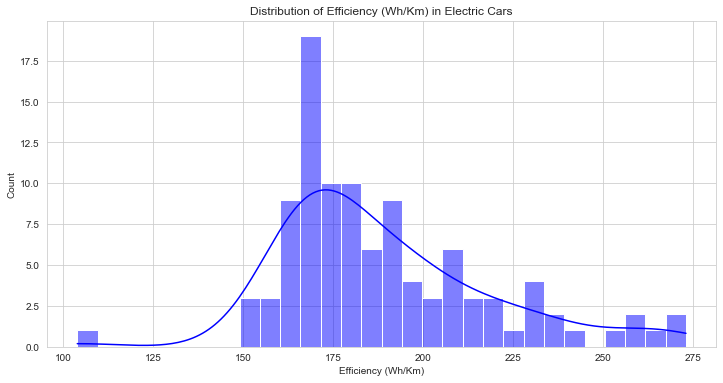

count    103.000000
mean     189.165049
std       29.566839
min      104.000000
25%      168.000000
50%      180.000000
75%      203.000000
max      273.000000
Name: Efficiency_WhKm, dtype: float64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of Efficiency
plt.figure(figsize=(12, 6))
sns.histplot(electric_car_data['Efficiency_WhKm'], kde=True, color='blue', bins=30)
plt.title('Distribution of Efficiency (Wh/Km) in Electric Cars')
plt.xlabel('Efficiency (Wh/Km)')
plt.ylabel('Count')
plt.show()

# Descriptive statistics for Efficiency
efficiency_stats = electric_car_data['Efficiency_WhKm'].describe()
efficiency_stats


전기차의 평균 효율성은 약 189.17 Wh/km입니다.

효율성 값은 대략 104 Wh/km에서 273 Wh/km 사이에 분포하고 있습니다.

대부분의 전기차는 168 Wh/km에서 203 Wh/km 사이의 효율성을 가지고 있습니다.

이 데이터는 전기차의 에너지 소비 효율성이 미래 환경 문제 해결에 중요한 역할을 할 수 있음을 시사합니다. 
효율적인 전기차는 적은 에너지로 더 많은 거리를 주행할 수 있으므로, 화석 연료 사용을 줄이고 이산화탄소 배출을 감소시킬 수 있습니다

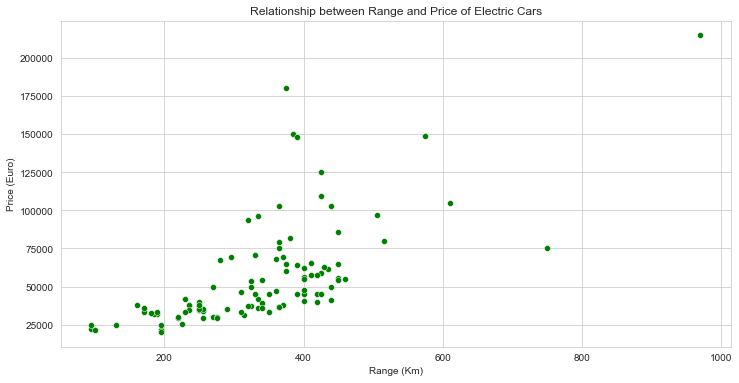

0.6748436092632102

In [5]:
# Plotting the relationship between Range and Price of electric cars
plt.figure(figsize=(12, 6))
sns.scatterplot(data=electric_car_data, x='Range_Km', y='PriceEuro', color='green')
plt.title('Relationship between Range and Price of Electric Cars')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.show()

# Calculating the correlation between Range and Price
correlation_range_price = electric_car_data['Range_Km'].corr(electric_car_data['PriceEuro'])
correlation_range_price


범위와 가격 사이에는 중간 정도의 상관 관계가 있습니다(상관 계수 약 0.675). 이는 범위가 늘어남에 따라 가격이 높아지는 경향이 있음을 의미합니다.

분포를 보면, 더 높은 범위를 가진 전기차는 일반적으로 더 높은 가격대에 위치합니다. 하지만 이는 예외적인 경우도 있음을 보여줍니다.

이 분석은 전기차의 보급과 환경 문제 해결에 중요한 시사점을 제공합니다. 높은 범위의 전기차가 더 비싸기 때문에, 이들의 대중화를 위해서는 가격 접근성을 개선하는 것이 중요할 수 있습니다.

더 많은 사람들이 저렴한 가격으로 높은 범위의 전기차를 구매할 수 있다면, 화석 연료 차량의 사용을 줄이고 환경 보호에 기여할 수 있을 것입니다

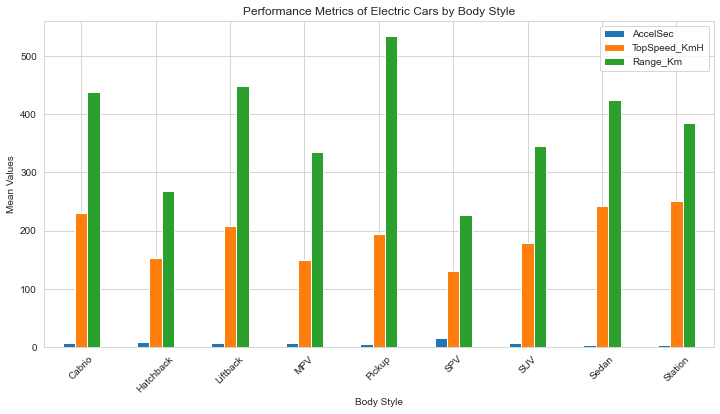

,AccelSec,TopSpeed_KmH,Range_Km
BodyStyle,,,
Cabrio,7.666667,230.000000,438.333333
Hatchback,8.868750,152.062500,268.593750
Liftback,6.140000,207.200000,449.000000
MPV,7.300000,150.000000,335.000000
Pickup,5.000000,193.333333,533.333333
SPV,15.466667,131.000000,226.666667
SUV,6.982222,179.177778,344.555556
Sedan,3.790000,242.900000,423.500000
Station,3.500000,250.000000,385.000000


In [6]:
# Grouping data by BodyStyle and calculating mean values of performance metrics
performance_by_bodystyle = electric_car_data.groupby('BodyStyle').mean()[['AccelSec', 'TopSpeed_KmH', 'Range_Km']]

# Plotting the performance metrics by BodyStyle
performance_by_bodystyle.plot(kind='bar', figsize=(12, 6))
plt.title('Performance Metrics of Electric Cars by Body Style')
plt.ylabel('Mean Values')
plt.xlabel('Body Style')
plt.xticks(rotation=45)
plt.show()

performance_by_bodystyle


가속 시간(AccelSec): Sedan과 Station 스타일의 전기차는 가장 빠른 평균 가속 시간을 보여줍니다. 반면, SPV(스포츠 유틸리티 차량)는 가장 느린 평균 가속 시간을 가지고 있습니다.

최고 속도(TopSpeed_KmH): Sedan과 Station 스타일이 가장 높은 평균 최고 속도를 보여주며, SPV 스타일은 가장 낮은 평균 최고 속도를 기록했습니다.

범위(Range_Km): Pickup 스타일의 전기차가 가장 높은 평균 범위를 보여줍니다. Hatchback 스타일은 가장 낮은 평균 범위를 가집니다.

이러한 분석을 통해 다양한 차체 스타일의 전기차가 환경 문제 해결에 기여할 수 있는 방법에 대해 이해할 수 있습니다. 예를 들어, 높은 범위와 빠른 가속 시간을 갖는 차량은 장거리 운행에 적합할 수 있으며, 이는 전기차의 사용을 촉진시키고 화석 연료 사용을 줄일 수 있습니다.

In [ ]:
#

In [8]:
# Performing K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster information to the original dataframe
electric_car_data['Cluster'] = clusters

# Checking the first few rows of the dataframe with the cluster labels
electric_car_data.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Cluster
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,2
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,1
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,2
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,0
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,1


In [9]:
# Calculating the mean values of features for each cluster
cluster_means = electric_car_data.groupby('Cluster').mean()[features]

# Displaying the mean values for each cluster
cluster_means


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm
Cluster,,,,
0,6.110000,185.666667,388.833333,221.533333
1,9.486792,149.415094,266.886792,170.754717
2,3.785000,248.400000,454.250000,189.400000


클러스터 0: 중간 범위와 속도를 가진, 상대적으로 더 높은 효율성을 보이는 전기차들로 구성됩니다.
    
클러스터 1: 더 낮은 속도와 범위를 가지지만, 가장 높은 효율성을 가진 전기차들로 구성됩니다. 이 그룹은 도심 지역에서의 사용에 적합할 수 있습니다.

클러스터 2: 빠른 가속, 높은 최고 속도, 그리고 가장 긴 범위를 가진 전기차들로 구성됩니다. 이 그룹의 차량은 고성능 모델일 가능성이 높습니다.

### 도시별 전기차 보급량 비교

In [12]:
# Load the new CSV file
new_csv_file_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive2/Electric_Vehicle_Population_Data.csv'
ev_population_data = pd.read_csv(new_csv_file_path)

# Display the first few rows of the dataframe and its summary
ev_population_data_head = ev_population_data.head()
ev_population_data_info = ev_population_data.info()
ev_population_data_description = ev_population_data.describe()

(ev_population_data_head, ev_population_data_info, ev_population_data_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

(   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
 0  5YJ3E1EB4L     Yakima     Yakima    WA      98908.0        2020  TESLA   
 1  5YJ3E1EA7K  San Diego  San Diego    CA      92101.0        2019  TESLA   
 2  7JRBR0FL9M       Lane     Eugene    OR      97404.0        2021  VOLVO   
 3  5YJXCBE21K     Yakima     Yakima    WA      98908.0        2019  TESLA   
 4  5UXKT0C5XH  Snohomish    Bothell    WA      98021.0        2017    BMW   
 
      Model                   Electric Vehicle Type  \
 0  MODEL 3          Battery Electric Vehicle (BEV)   
 1  MODEL 3          Battery Electric Vehicle (BEV)   
 2      S60  Plug-in Hybrid Electric Vehicle (PHEV)   
 3  MODEL X          Battery Electric Vehicle (BEV)   
 4       X5  Plug-in Hybrid Electric Vehicle (PHEV)   
 
   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
 0           Clean Alternative Fuel Vehicle Eligible             322   
 1           Clean Alternative Fuel Vehicle Eligible  

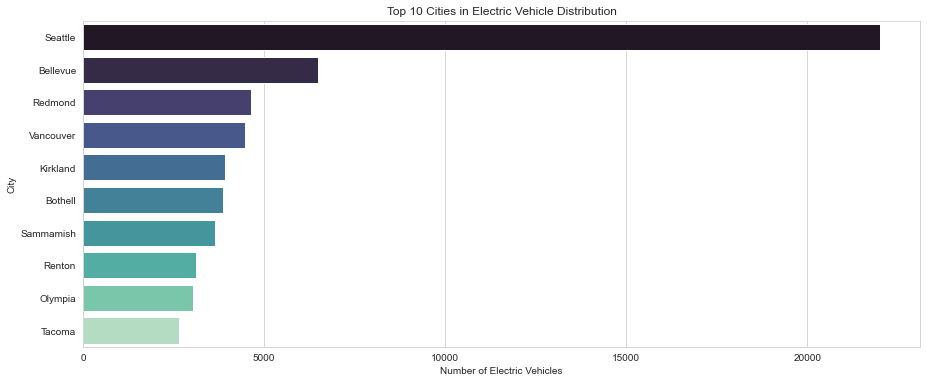

City
Seattle      22009
Bellevue      6489
Redmond       4646
Vancouver     4464
Kirkland      3923
Bothell       3852
Sammamish     3653
Renton        3115
Olympia       3041
Tacoma        2655
dtype: int64

In [16]:
# Grouping the data by City and counting the number of electric vehicles
citywise_ev_distribution = ev_population_data.groupby('City').size().sort_values(ascending=False).head(10)  # Top 10 cities

# Plotting the citywise distribution
plt.figure(figsize=(15, 6))
sns.barplot(x=citywise_ev_distribution.values, y=citywise_ev_distribution.index, palette="mako")
plt.title('Top 10 Cities in Electric Vehicle Distribution')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.show()

citywise_ev_distribution


시애틀(Seattle)이 압도적으로 많은 전기차 보급을 보이며 1위를 차지하고 있습니다.

벨뷰(Bellevue)와 레드몬드(Redmond)가 그 뒤를 이어 상당한 수의 전기차 보급이 있는 것으로 나타납니다.

밴쿠버(Vancouver), 커크랜드(Kirkland), 보델(Bothell) 등 다른 도시들도 상위 목록에 포함되어 있습니다.

이는 시애틀이 압도적으로 인구수가 높기때문이다.

In [20]:
ev_population_data['City'].unique()

array(['Yakima', 'San Diego', 'Eugene', 'Bothell', 'Everett', 'Poulsbo',
       'Naches', 'Port Orchard', 'Olalla', 'Olympia', 'Marysville',
       'Indio', 'Rosamond', 'Mukilteo', 'Edmonds', 'Bainbridge Island',
       'Moses Lake', 'Anacortes', 'Tumwater', 'Newcastle', 'Burien',
       'Yelm', 'Selah', 'Seattle', 'Lynnwood', 'Snohomish', 'Leavenworth',
       'Silverdale', 'Suquamish', 'Kingston', 'Bremerton', 'Rainier',
       'Clinton', 'Pullman', 'Kent', 'Chewelah', 'Bow', 'Rockford',
       'Walla Walla', 'Hatton', 'Langley', 'Zillah', 'Coronado',
       'Fircrest', 'Spokane Valley', 'Bellevue', 'Redmond', 'Vancouver',
       'Battle Ground', 'Kirkland', 'Wenatchee', 'Fall City', 'Tacoma',
       'Ridgefield', 'Edgewood', 'Ilwaco', 'Woodinville', 'Renton',
       'Monroe', 'Camano Island', 'Bellingham', 'Camas', 'Issaquah',
       'Mercer Island', 'Longview', 'Des Moines', 'Duvall', 'Brier',
       'Sedro-Woolley', 'Milton', 'Cle Elum', 'Maple Valley', 'Sammamish',
       'Norman

### 배터리 타입 구별 

In [25]:
# 데이터셋 예시 (실제 데이터셋으로 대체하세요)
data = ev_population_data['Electric Vehicle Type']

# Pandas DataFrame 생성
df = pd.DataFrame(data)

# 배터리 타입별 개수 계산
battery_count = df['Electric Vehicle Type'].value_counts()

# 결과 출력
print(battery_count)

Battery Electric Vehicle (BEV)            96266
Plug-in Hybrid Electric Vehicle (PHEV)    28450
Name: Electric Vehicle Type, dtype: int64


BEV 보조금 강화: BEV를 더 많이 구매하도록 장려하기 위해 정부는 BEV 구매자에게 더 큰 보조금을 제공할 수 있습니다. 이로써 BEV의 경제적인 이점을 강조하고 미래 사회에서 친환경 차량을 선택하도록 독려할 수 있습니다.

충전 인프라 확대: BEV는 전기 충전 인프라에 더 많은 의존성이 있으므로, BEV 보급을 지원하기 위해 충전 인프라를 확대하고 개선해야 합니다. 이로써 BEV 소유자들이 편리하게 충전할 수 있게 됩니다.


### 배터링 용량 클러스터링

In [32]:
import zipfile
import os

# File paths for the uploaded datasets
file_paths = ['C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive3.zip', 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive4.zip', 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive5.zip']

# Function to extract the contents of the zip files and list the files in each
def extract_and_list_files(file_paths):
    extracted_folders = []
    for file_path in file_paths:
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            extract_folder = '/mnt/data/' + os.path.basename(file_path).replace('.zip', '')
            zip_ref.extractall(extract_folder)
            extracted_folders.append(extract_folder)

    # Listing the contents of each extracted folder
    extracted_contents = {}
    for folder in extracted_folders:
        extracted_contents[folder] = os.listdir(folder)
    
    return extracted_contents

extracted_files = extract_and_list_files(file_paths)
extracted_files


{'/mnt/data/archive3': ['station_data_dataverse.csv'],
 '/mnt/data/archive4': ['Electric Cars VS Motor Cars.csv'],
 '/mnt/data/archive5': ['Cars 1.csv',
  'cars.csv',
  'Electric Car.csv',
  'Electric Vehicle Population Data.csv',
  'FEV data.xlsx']}

In [33]:
import pandas as pd

# Load and display the first few rows of each dataset to understand their structure
def load_and_preview_dataset(file_path):
    # Handling different file formats
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        return f"Unsupported file format for {file_path}"
    
    return df.head()

# Previewing the first dataset from each archive
preview_data = {}
for folder, files in extracted_files.items():
    for file in files:
        file_path = os.path.join(folder, file)
        preview_data[file] = load_and_preview_dataset(file_path)

preview_data.keys(), preview_data[next(iter(preview_data))]  # Show the names of the datasets and preview of the first one


(dict_keys(['station_data_dataverse.csv', 'Electric Cars VS Motor Cars.csv', 'Cars 1.csv', 'cars.csv', 'Electric Car.csv', 'Electric Vehicle Population Data.csv', 'FEV data.xlsx']),
    sessionId  kwhTotal  dollars              created                ended  \
 0    1366563      7.78     0.00  0014-11-18 15:40:26  0014-11-18 17:11:04   
 1    3075723      9.74     0.00  0014-11-19 17:40:26  0014-11-19 19:51:04   
 2    4228788      6.76     0.58  0014-11-21 12:05:46  0014-11-21 16:46:04   
 3    3173284      6.17     0.00  0014-12-03 19:16:12  0014-12-03 21:02:18   
 4    3266500      0.93     0.00  0014-12-11 20:56:11  0014-12-11 21:14:06   
 
    startTime  endTime  chargeTimeHrs weekday platform  ...  managerVehicle  \
 0         15       17       1.510556     Tue  android  ...               0   
 1         17       19       2.177222     Wed  android  ...               0   
 2         12       16       4.671667     Fri  android  ...               0   
 3         19       21       1.7

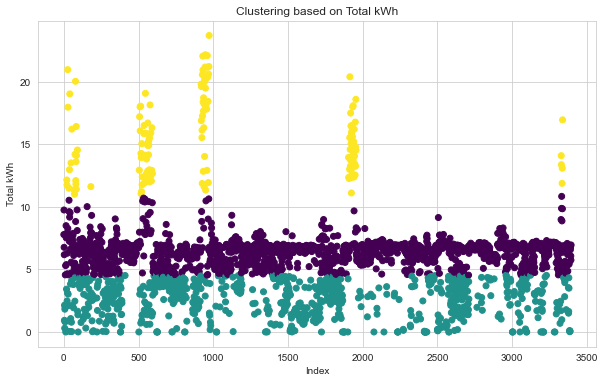

In [42]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 데이터셋 로드
df = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive3/station_data_dataverse.csv')  # 'your_dataset.csv'를 데이터셋의 경로로 바꿔주세요

# 클러스터링에 사용할 변수 선택 ('kwhTotal'만 사용)
cluster_df = df[['kwhTotal']]

# 결측값 제거
cluster_df = cluster_df.dropna()

# K-평균 클러스터링 적용 (3개의 클러스터로 설정)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_df['cluster'] = kmeans.fit_predict(cluster_df)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(cluster_df.index, cluster_df['kwhTotal'], c=cluster_df['cluster'], cmap='viridis')
plt.title('Clustering based on Total kWh')
plt.xlabel('Index')
plt.ylabel('Total kWh')
plt.show()

가장 많이 분포해있는 kwh는 0~5입니다. 


#### 경제적 저렴한 모델 개발:

저용량 배터리를 가진 전기차 모델을 개발하여 저렴한 가격으로 판매할 수 있습니다. 이는 전기차의 접근성을 높이고 더 많은 사람들이 전환할 수 있도록 도울 것입니다.